In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apartado 2. Regresión Lineal Regularizada - Curva de Aprendizaje

In [2]:
#Hipotesis
def hipotesis(X, Theta):
    return Theta[0] + Theta[1] * X

In [3]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    h = np.dot(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    return J

In [4]:
def gradient_funct(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    h = np.dot(X, Theta)
    grad = np.matmul(h - y, X)
    grad = grad/m
    grad_0 = grad[0]
    reg_term = (Lambda/m)*Theta
    grad = grad + reg_term
    grad[0] = grad_0
    return grad

In [5]:
def draw_graph(Theta, X, y, result, newX):
    #plt.scatter(X, y, marker = 'x', c = 'red')
    lineY = newX.dot(result.x)
    plt.plot(newX, lineY, c='blue')
    plt.legend()
    plt.show()

In [6]:
def learning_curve(X, y, Lambda, Theta, Xval, yval):
    
    m1 = X.shape[0]
    m2 = Xval.shape[0]
    err1 = np.zeros(m1)
    err2 = np.zeros(m2)
    
    for i in range(1, X.shape[0] + 1):
        result = opt.minimize(cost_and_gradient, Theta, args=(X[0:i], y[0:i], Lambda), jac=True, method='TNC')
        ThetasOpt = result.x
        
        err1[i - 1] = error_calculation(ThetasOpt, X[0:i], y[0:i], m1)
        err2[i - 1] = error_calculation(ThetasOpt, Xval, yval, m2)
        
    return err1, err2

In [7]:
def error_calculation(Theta, X, y, m):
    h = np.dot(X, Theta)
    J = np.sum((h - y.T)**2)
    J = J/(2*m)
    return J

In [8]:
def draw_learning_curve(err1, err2):
    l = np.arange(len(err1))
    b = err1
    plt.plot(l, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(l, d, c="orange", label="Cross Validation")

# Nuevo del apartado 3

In [9]:
def generate_new_training_data(X, p):
    newX = X
    for i in range(2, p + 1):
        #newX = np.hstack([newX, X ** i])
        newX = np.column_stack([newX, X ** i])
    return newX

In [10]:
def normalize_attributes(X, mean, std_des):
    X_norm = X - mean
    X_norm = X_norm / std_des
    return X_norm

In [11]:
def cost_and_gradient(Theta, X, y, Lambda):
    return cost_funct(Theta, X, y, Lambda), gradient_funct(Theta, X, y, Lambda)

In [12]:
def draw_points(X, y, p, mean, std_des, result):
    # Pintamos grafica
    plt.figure()
    plt.plot(X, y, "x", color='red')
    lineX = np.arange(np.min(X) - 5,np.max(X) + 6,0.05)
    aux_x = (generate_new_training_data(lineX, p) - mean) / std_des
    lineY = np.hstack([np.ones([len(aux_x),1]),aux_x]).dot(result.x)
    plt.plot(lineX, lineY, '-', c = 'blue')
    plt.show()
    plt.close()
    #draw_graph(ThetaOpt, X, y, result, newX)

In [13]:
def main():
    
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    
    X = mat.get("X")
    y = mat.get("y")
    y = y[:, -1]
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    yval = yval[:, -1]
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    #Grado del polinomio
    p = 8
    
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newX = generate_new_training_data(X, p)
    #Media
    mean = np.mean(newX, axis = 0)
    #Desviacion Estandar
    std_des = np.std(newX, axis = 0)
    #Se normalizan los atributos
    X_norm = normalize_attributes(newX, mean, std_des)
    #Se añade columna de 1s
    newX = np.hstack([np.ones([X_norm.shape[0], 1]), X_norm])
    #Tambien se puede escribir: newX = np.insert(X_norm, 0, 1, axis=1)
    #print("newX:", newX)
    
    #Theta = np.ones(newX.shape[1])
    Theta = np.zeros(newX.shape[1])
    
    #result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(newX, y, Lambda))
    result = opt.minimize(cost_and_gradient, Theta, args=(newX, y, Lambda), jac=True, method='TNC')
    
    draw_points(X, y, p, mean, std_des, result)
    
    
    #Apartado 3.2
    
    #Se genera nuevos datos de VALIDACION a partir de los datos originales Xval
    newXval = generate_new_training_data(Xval, p)
    #Media
    mean_val = np.mean(newXval, axis = 0)
    #Desviacion Estandar
    std_des_val = np.std(newXval, axis = 0)
    #Se normalizan los atributos
    X_norm_val = normalize_attributes(newXval, mean, std_des)
    #Se añade columna de 1s
    newXval = np.hstack([np.ones([X_norm_val.shape[0], 1]), X_norm_val])
    #newXval = X_norm_val
    
    p#rint("newX", newX)
    #print("newXval", newXval)
    
    err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    draw_learning_curve(err1, err2)
    
    plt.show()
    

(12, 1) (12,)
(21, 1) (21,)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026


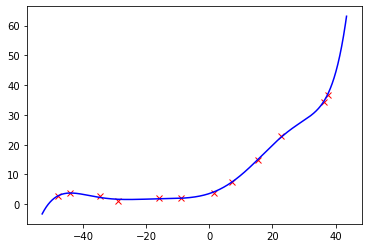

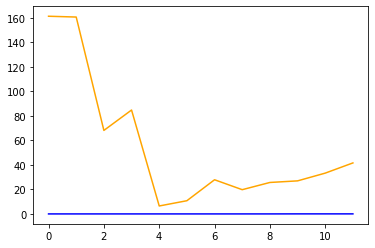

In [14]:
main()